In [12]:
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from collections import Counter
from wordcloud import WordCloud
from sklearn.decomposition import PCA
import gensim.downloader as api
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Tải tài nguyên cần thiết từ nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# Download the resource for English specifically
nltk.download('averaged_perceptron_tagger_eng')  # This line is added to download the resource


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [3]:
#Đọc file
with open('/content/Alice in Wonderland.txt', 'r', encoding='utf-8') as f:
    raw_text = f.read()

In [4]:
# Làm sạch văn bản
clean_text = re.sub(r'\*{3}.*?\*{3}', '', raw_text, flags=re.DOTALL)
clean_text = re.sub(r'\[.*?\]', '', clean_text)
clean_text = re.sub(r'[^a-zA-Z\s]', '', clean_text)
clean_text = clean_text.lower()

# Tokenize
tokens = word_tokenize(clean_text)

# Loại bỏ stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words and word.isalpha()]

# Hàm ánh xạ POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# POS tagging
tagged_tokens = pos_tag(tokens)

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = []
for word, pos in tagged_tokens:
    wn_pos = get_wordnet_pos(pos)
    lemma = lemmatizer.lemmatize(word, wn_pos)
    lemmatized_tokens.append(lemma)


# for (word, pos), lemma in zip(tagged_tokens, lemmatized_tokens):
#     print(f"{word} ({pos}) → {lemma}")

# print(lemmatized_tokens)


In [5]:
# Tính tần suất từ
word_freq = Counter(lemmatized_tokens)

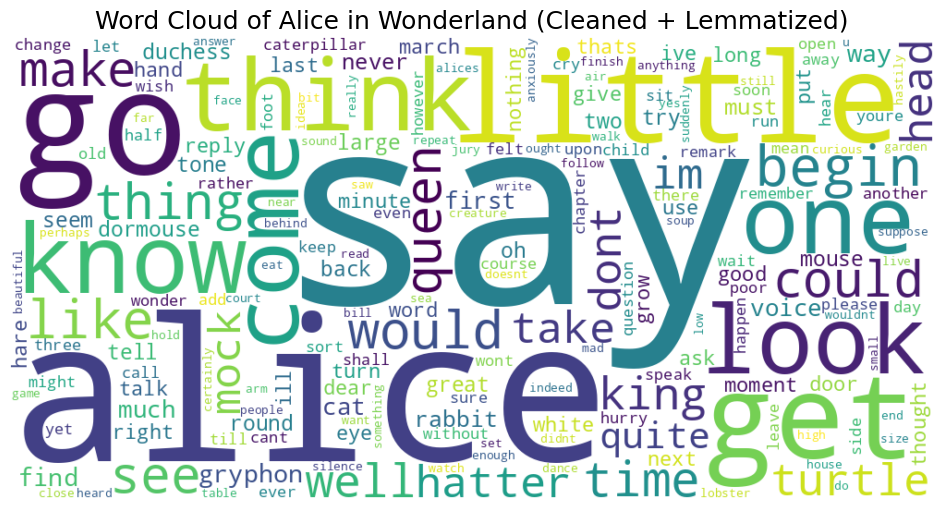

In [6]:
# Word Cloud
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Alice in Wonderland (Cleaned + Lemmatized)', fontsize=18)
plt.show()

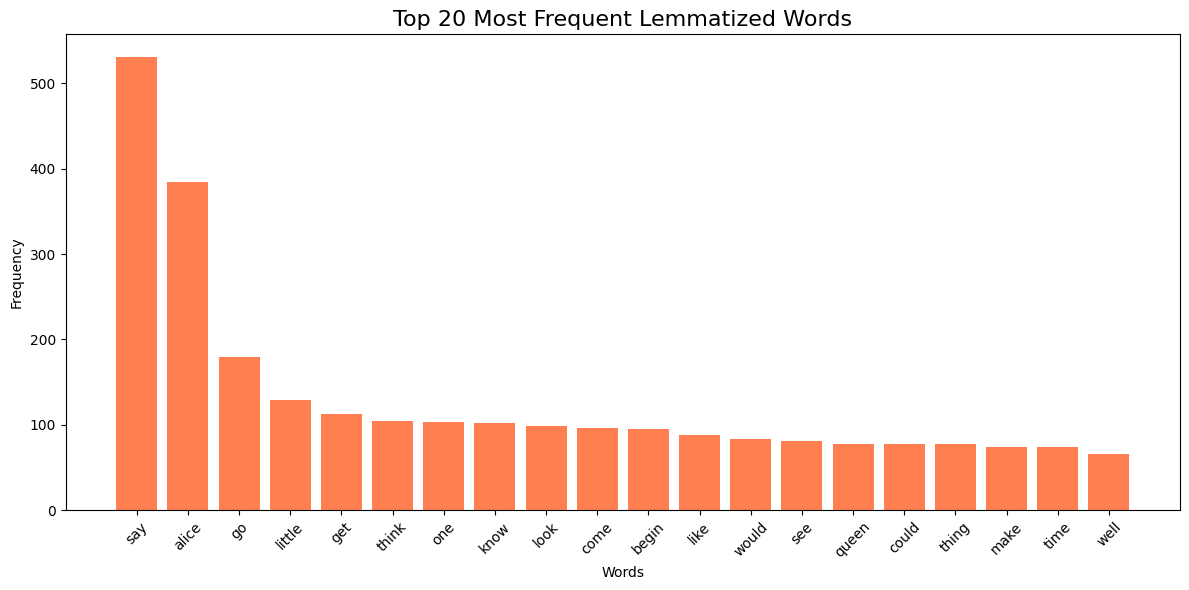

In [7]:
#Bar Chart top 20
top_n = 20
common_words = word_freq.most_common(top_n)
words, freqs = zip(*common_words)

plt.figure(figsize=(12, 6))
plt.bar(words, freqs, color='coral')
plt.xticks(rotation=45)
plt.title(f'Top {top_n} Most Frequent Lemmatized Words', fontsize=16)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

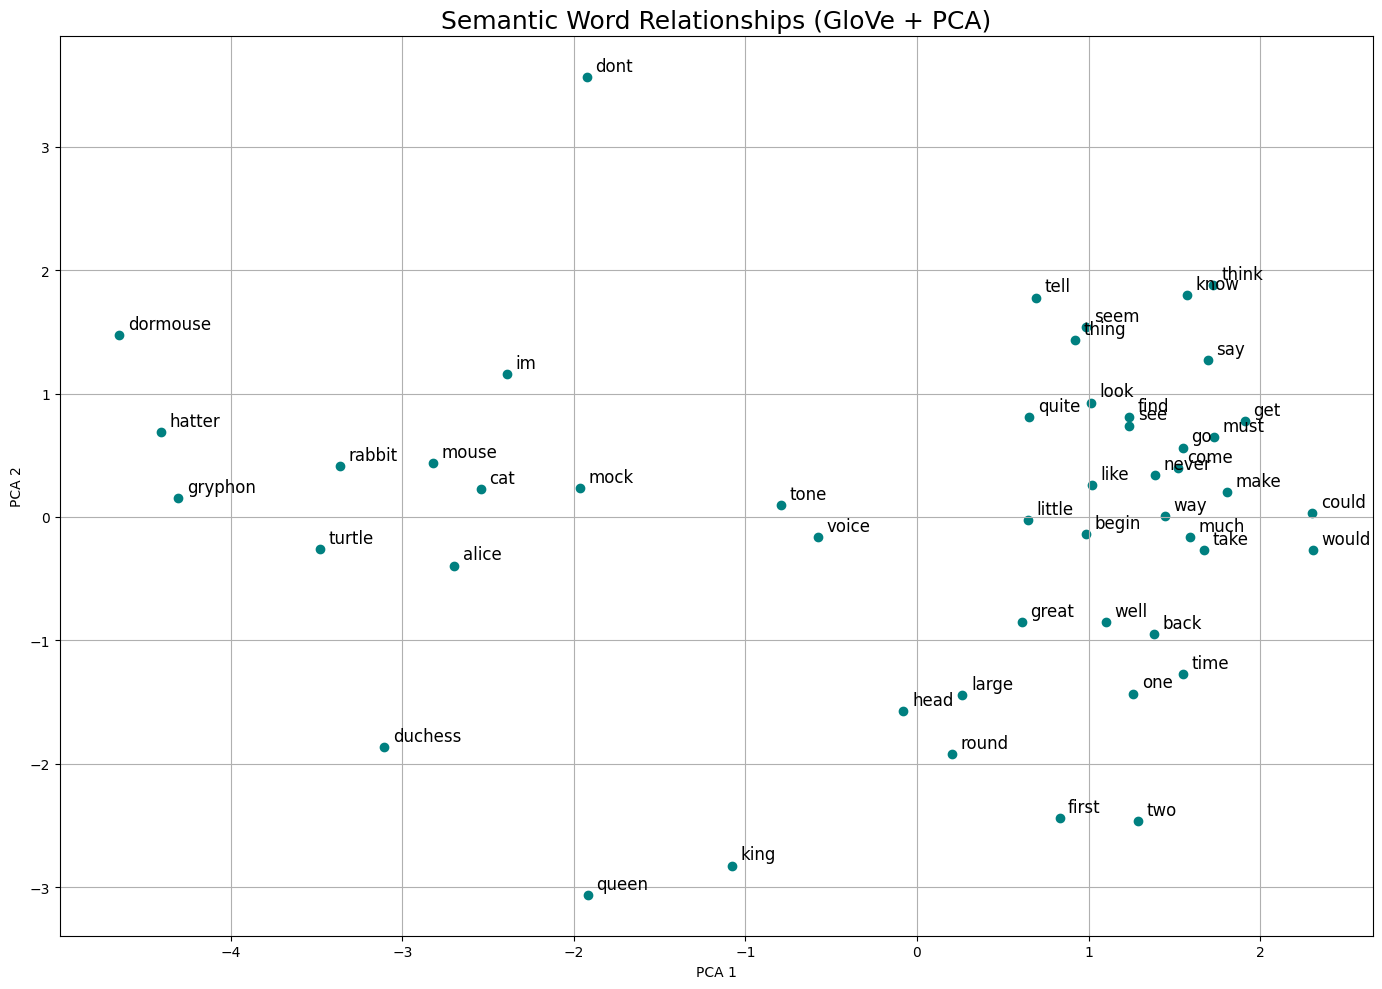

In [13]:
#Plot semantic word relationships using GloVe embeddings and PCA
# Tải pre-trained GloVe từ gensim
glove = api.load("glove-wiki-gigaword-100")

#Chọn top từ phổ biến có trong GloVe
top_n = 50
top_words = [word for word, _ in word_freq.most_common(200) if word in glove][:top_n]

#Lấy vector tương ứng
word_vectors = np.array([glove[word] for word in top_words])

# Giảm chiều với PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

#Vẽ biểu đồ scatter
plt.figure(figsize=(14, 10))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color='teal')

for i, word in enumerate(top_words):
    plt.text(reduced_vectors[i, 0]+0.05, reduced_vectors[i, 1]+0.05, word, fontsize=12)

plt.title("Semantic Word Relationships (GloVe + PCA)", fontsize=18)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.tight_layout()
plt.show()


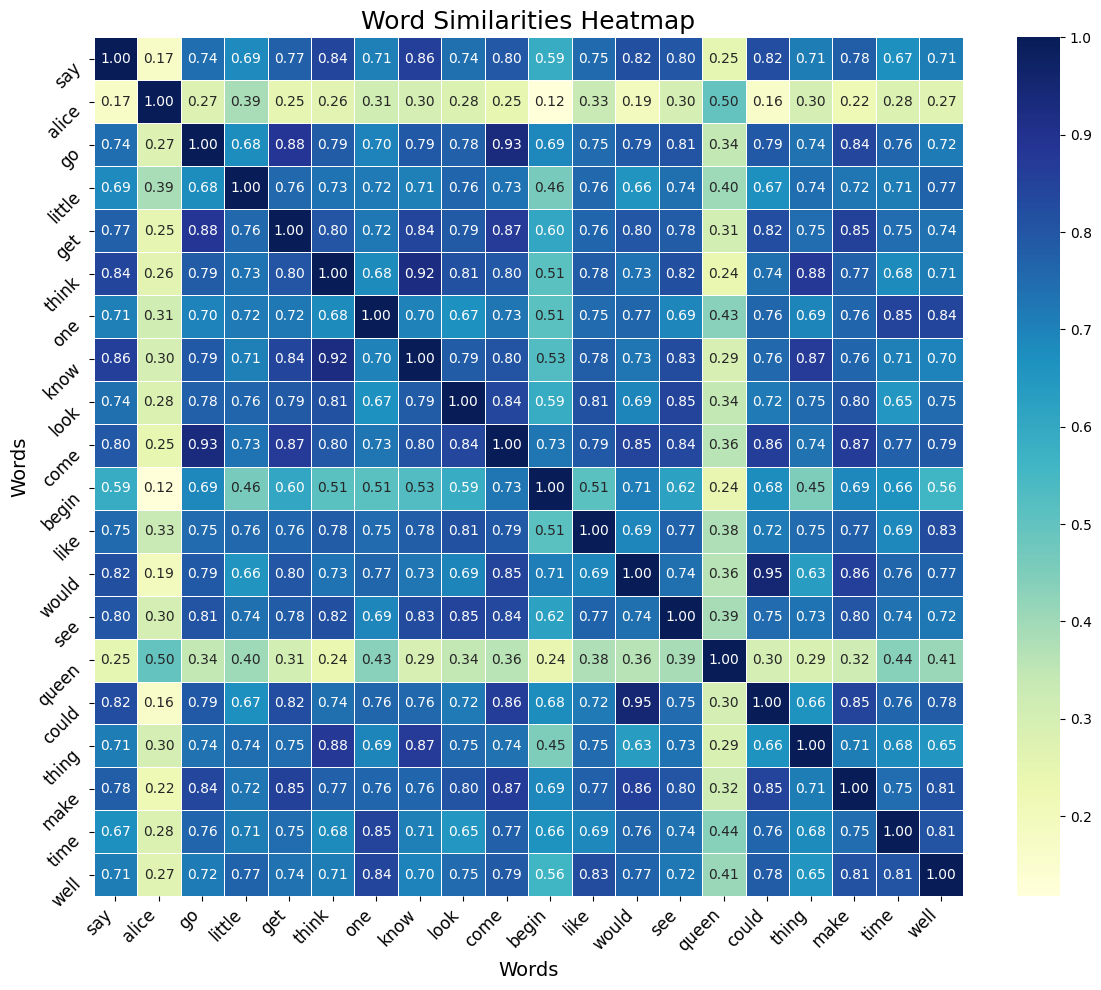

In [17]:
# vẽ heatmap
#Chọn top từ phổ biến có trong GloVe
top_n = 20  # Giảm số từ để dễ đọc hơn
top_words = [word for word, _ in word_freq.most_common(200) if word in glove][:top_n]

#Lấy vector tương ứng từ GloVe
word_vectors = np.array([glove[word] for word in top_words])

# Tính toán độ tương đồng cosine giữa các vector từ
similarity_matrix = cosine_similarity(word_vectors)

# Vẽ heatmap cho ma trận tương đồng với các cải tiến
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, xticklabels=top_words, yticklabels=top_words, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=0.5)

plt.title("Word Similarities Heatmap", fontsize=18)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Words", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=45, va="top", fontsize=12)
plt.tight_layout()
plt.show()